In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import sklearn 
print("sklearn version", sklearn.__version__)

sklearn version 1.0.2


In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt 

In [4]:
test_df = pd.read_csv('../input/titanic/test.csv')

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df = pd.read_csv('../input/titanic/train.csv')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.shape

(891, 12)

In [9]:
#bring the target into a dataframe 
y = train_df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
#define the columns we want for training and create a new dataframe 
train_cols = ['Pclass','Sex','Age','Fare', 'Embarked']
X = train_df[train_cols]
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [11]:
#find null values in our training data 
X.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough')

transformed = transformer.fit_transform(X)
X_encoded = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out())

In [13]:
X_encoded.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,remainder__Pclass,remainder__Age,remainder__Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,22.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,38.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,3.0,26.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,3.0,35.0,8.0500


In [14]:
X_encoded = X_encoded.rename(columns = {'onehotencoder__Sex_female': 'Female', 'onehotencoder__Sex_male': 'Male', 
                                      'onehotencoder__Embarked_C' : 'Embarked_C',
                                       'onehotencoder__Embarked_Q': 'Embarked_Q',
                                       'onehotencoder__Embarked_S': 'Embarked_S',
                                       'onehotencoder__Embarked_nan':'Embarked_nan',
                                       'remainder__Pclass': 'Pclass',
                                       'remainder__Age':'Age',
                                       'remainder__Fare':'Fare'})

In [15]:
X_encoded.head()

,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass,Age,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,22.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,38.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,3.0,26.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,3.0,35.0,8.0500


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded,y,train_size=0.8, test_size=0.2,random_state=0)

In [17]:
#break off the labels
print('train shape', X_train.shape)
print('valid_shape', X_valid.shape)

train shape (712, 9)
valid_shape (179, 9)


In [18]:
print('training missing values' , X_train.isnull().sum()) 
print('valid missing values', X_valid.isnull().sum())

training missing values Female            0
Male              0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
Pclass            0
Age             141
Fare              0
dtype: int64
valid missing values Female           0
Male             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Embarked_nan     0
Pclass           0
Age             36
Fare             0
dtype: int64


In [19]:
X_train.head()

,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass,Age,Fare
140,1.0,0.0,1.0,0.0,0.0,0.0,3.0,NaN,15.2458
439,0.0,1.0,0.0,0.0,1.0,0.0,2.0,31.0,10.5000
817,0.0,1.0,1.0,0.0,0.0,0.0,2.0,31.0,37.0042
378,0.0,1.0,1.0,0.0,0.0,0.0,3.0,20.0,4.0125
491,0.0,1.0,0.0,0.0,1.0,0.0,3.0,21.0,7.2500


In [20]:
X_valid.head()

,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass,Age,Fare
495,0.0,1.0,1.0,0.0,0.0,0.0,3.0,NaN,14.4583
648,0.0,1.0,0.0,0.0,1.0,0.0,3.0,NaN,7.5500
278,0.0,1.0,0.0,1.0,0.0,0.0,3.0,7.0,29.1250
31,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,146.5208
255,1.0,0.0,1.0,0.0,0.0,0.0,3.0,29.0,15.2458


In [21]:
from sklearn.impute import SimpleImputer 

my_imputer = SimpleImputer() 

X_train_imputed = pd.DataFrame(my_imputer.fit_transform(X_train)) 
X_valid_imputed = pd.DataFrame(my_imputer.transform(X_valid))

X_train_imputed.columns = X_train.columns
X_valid_imputed.columns = X_valid.columns




In [22]:
print('training missing values' , X_train_imputed.isnull().sum()) 
print('valid missing values', X_valid_imputed.isnull().sum())

training missing values Female          0
Male            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
Pclass          0
Age             0
Fare            0
dtype: int64
valid missing values Female          0
Male            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Embarked_nan    0
Pclass          0
Age             0
Fare            0
dtype: int64


In [23]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler() 
X_train_imputed_scaled = pd.DataFrame(X_train_imputed)

X_train_imputed_scaled[['Age', 'Pclass', 'Fare']] = my_scaler.fit_transform(X_train_imputed_scaled[['Age', 'Pclass', 'Fare']])

X_train_imputed_scaled.head()


,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Pclass,Age,Fare
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.366509,0.029758
1,0.0,1.0,0.0,0.0,1.0,0.0,0.5,0.382327,0.020495
2,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.382327,0.072227
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.243666,0.007832
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.256271,0.014151


In [24]:
X_train_imputed_scaled['Pclass'].describe()

count    712.000000
mean       0.658708
std        0.416884
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        1.000000
Name: Pclass, dtype: float64

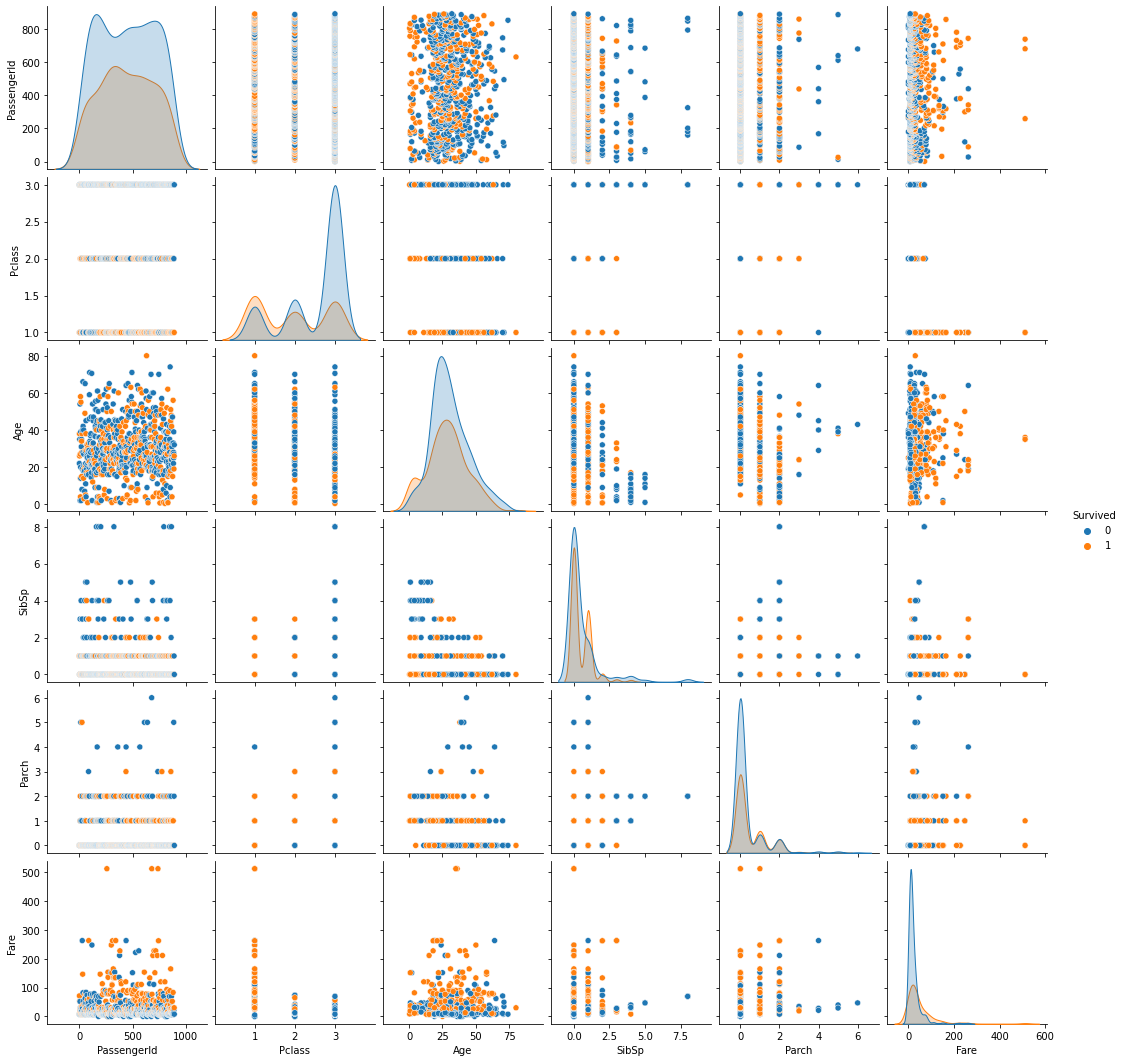

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.pairplot(train_df, hue='Survived')

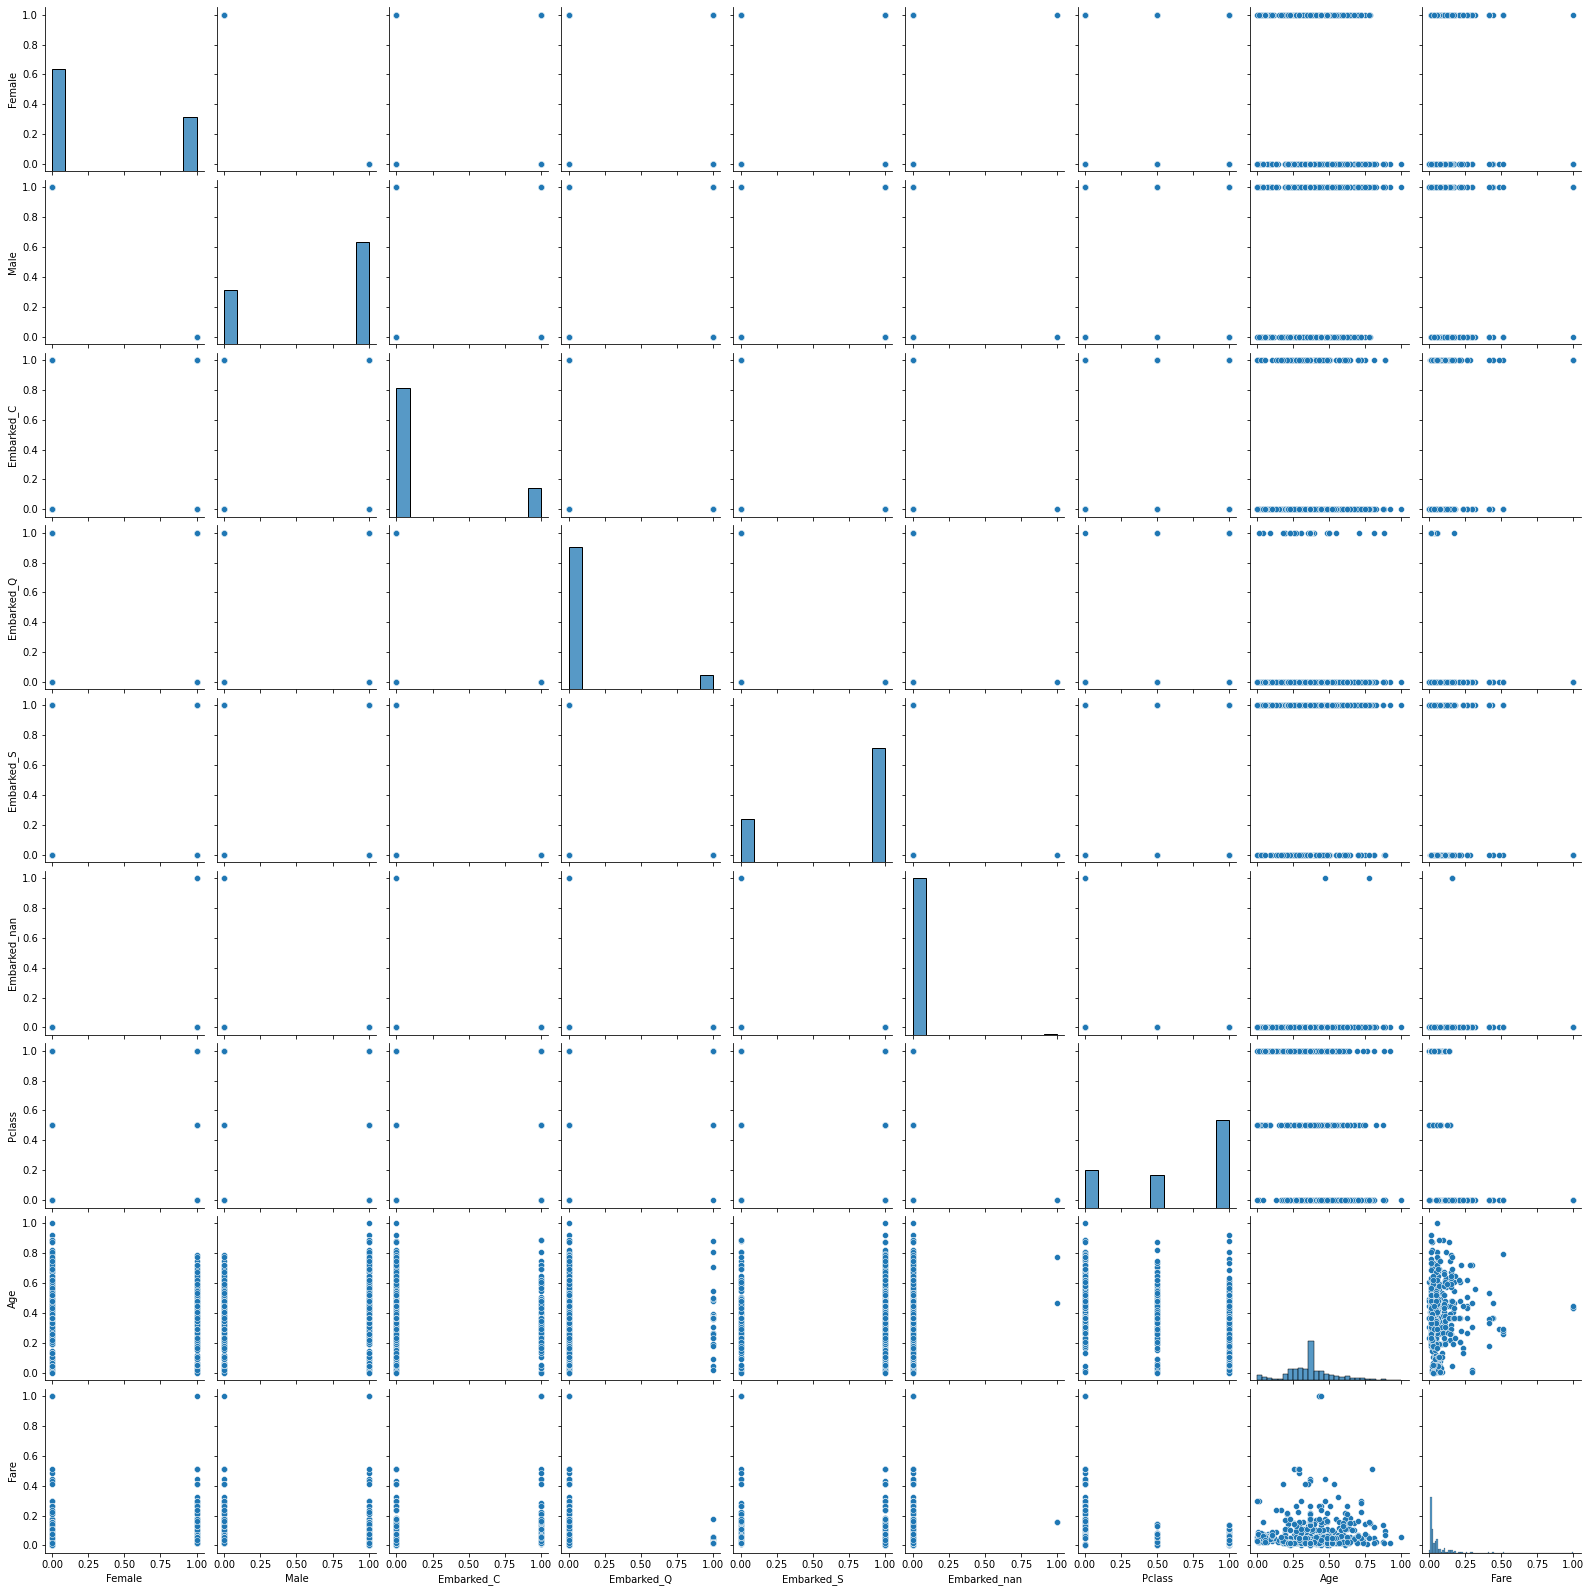

In [26]:
sb.pairplot(X_train_imputed)